# First homework for computational mathematics course (06.09.2022)

In [2]:
import numpy as np
import pylab as plt
import time

## Exercise 1

In [3]:
size = 5
size_a = 6
size_b = 10

a = np.zeros((size,size_a)).T
b = np.ones((size, size_b)).T

c = np.concatenate((a,b), axis=0)
print(c)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [55]:
mat_size = 6
vec_size = 10
M = np.random.rand(mat_size,mat_size)
a = np.random.choice(np.arange(0,mat_size), size=vec_size)
b = np.random.choice(np.arange(0,mat_size), size=vec_size)

A = M[a,b]
print(A)

[0.08861063 0.69607874 0.99928825 0.9880416  0.38093266 0.89173785
 0.68487444 0.82541867 0.35943317 0.11064091]


In [4]:
size = 5
M = np.random.rand(size,size)

trace = np.trace(M)
M[M != 0] = 1
not_null = np.trace(M)
print(trace, not_null)

NameError: name 'vec_size' is not defined

In [10]:
shape = (4,6,5)
M = np.random.choice([0,1], size=shape)

unique, counts = np.unique(M, return_counts=True)
print(unique, counts)

[0 1] [62 58]


In [58]:
n = 5
m = 6
A = np.random.choice([-1, 1], size=(n, m))
B = np.ones((n, m))

B[A < 0] = 0
print(A, B)

[[ 1  1  1  1  1 -1]
 [-1 -1  1  1 -1  1]
 [ 1  1 -1  1  1 -1]
 [-1 -1  1 -1  1  1]
 [-1 -1  1  1 -1  1]] [[1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [1. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 1. 0. 1.]]


In [15]:
n = 3
m = 2
M = np.random.rand(n, m)
M = np.concatenate((M, np.zeros((3,2))), axis=1)
                   

N = M - np.mean(M, axis=0)
L = N/np.sqrt(np.sum(N**2, axis=0))
L = np.nan_to_num(L)
L

/tmp/ipykernel_168016/1124651624.py:8: RuntimeWarning: invalid value encountered in true_divide
  L = N/np.sqrt(np.sum(N**2, axis=0))


array([[-0.5673859 ,  0.35814411,  0.        ,  0.        ],
       [-0.22479001, -0.81452433,  0.        ,  0.        ],
       [ 0.79217592,  0.45638022,  0.        ,  0.        ]])

In [21]:
n = 3
m = 2
M = np.random.rand(n, m)
N = np.random.rand(n, m)

K = np.dot(M.T, N)
K

array([[1.37769158, 0.62034848],
       [0.75288296, 0.79193578]])

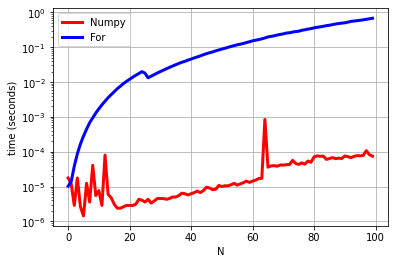

In [19]:
Nmax_numpy = 100
Nmax_for = 100

time_numpy = []
time_for = []

for i in range(1, Nmax_numpy+1):
    K = np.random.rand(i, i)
    L = np.random.rand(i, i)
    start_numpy = time.time()
    M = np.dot(K, L)
    end_numpy = time.time()
    
    time_numpy.append(end_numpy - start_numpy)
    
for i in range(1, Nmax_for+1):
    K = np.random.rand(i, i)
    L = np.random.rand(i, i)
    M = np.zeros((i, i))
    start_for = time.time()
    for j in range(i):
        for k in range(i):
            for l in range(i):
                M[j][k] += K[j][l]*L[l][k]
    end_for = time.time()
    
    time_for.append(end_for - start_for)
    
plt.plot(time_numpy, c='r', lw=3, label='Numpy')
plt.grid()
plt.xlabel('N')
plt.ylabel('time (seconds)')
plt.plot(time_for, c='b', lw=3, label='For')
plt.legend()
plt.yscale('log')
plt.show()

## Exercise 2

<function matplotlib.pyplot.show(close=None, block=None)>

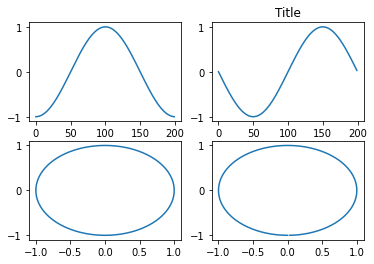

In [20]:
x1 = np.cos(np.arange(-np.pi, np.pi, np.pi/100))
x2 = np.sin(np.arange(-np.pi, np.pi, np.pi/100))


fig, axs = plt.subplots(2, 2)
axs[0][0].plot(x1)
axs[0][1].plot(x2)
axs[1][0].plot(x1, x2)
axs[1][1].plot(x2, x1)
axs[0][1].set_title("Title")
plt.show

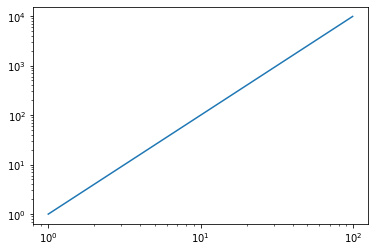

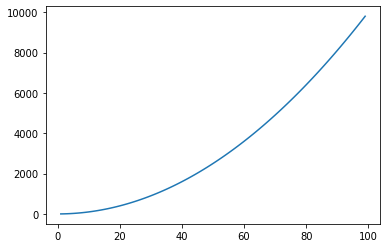

In [35]:
x = np.arange(1, 100)
y = x**5
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

plt.plot(x, y)
plt.show()

## Exercise 3

<ErrorbarContainer object of 3 artists>

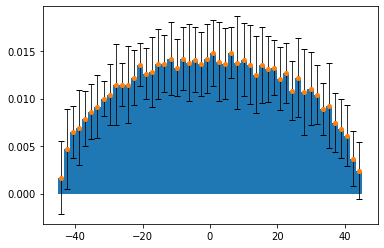

In [22]:
N = 250
k = 20
nbins = 50

M = np.random.normal(0, 1, (N, N))
M = M.T + M
W = np.linalg.eigvals(M)
HISTS = []
hist, bins = np.histogram(W, bins=nbins)
HISTS.append(hist)
    
for i in range(k):
    M = np.random.normal(0, 1, (N, N))
    M = M.T + M
    w = np.linalg.eigvals(M)
    W = np.concatenate((W,w))
    hist, bins = np.histogram(w, bins=nbins)
    HISTS.append(hist)

error = np.std(HISTS, axis=0)/N
plt.hist(W, bins=nbins, density=True)

hist, bins = np.histogram(W, bins=nbins, density=True)
bins = 0.5 * (bins[1:] + bins[:-1])
plt.errorbar(bins, hist, yerr=error, marker='o', markersize=4, 
             linestyle='none', ecolor='k', elinewidth=0.8,
             capsize=3, capthick=1)